<a href="https://colab.research.google.com/github/WallaceSantana79/CursoMachineLearning/blob/main/S%C3%A9rie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação da biblioteca

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.4 MB/s eta 0:00:00


#Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

#Carregamento da base de dados

In [ ]:
dataset = pd.read_csv('AirPassengers.csv')

In [ ]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m')
dataset = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

<ipython-input-6-74cc61d1863b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m')


In [ ]:
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
time_series = dataset['#Passengers']

In [ ]:
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

#Exploração da série temporal

In [ ]:
time_series[1]

118

In [ ]:
time_series['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [ ]:
time_series[datetime(1949,2,1)]

118

In [ ]:
time_series['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [ ]:
time_series[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [ ]:
time_series['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [ ]:
time_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [ ]:
time_series.index.min()

Timestamp('1949-01-01 00:00:00')

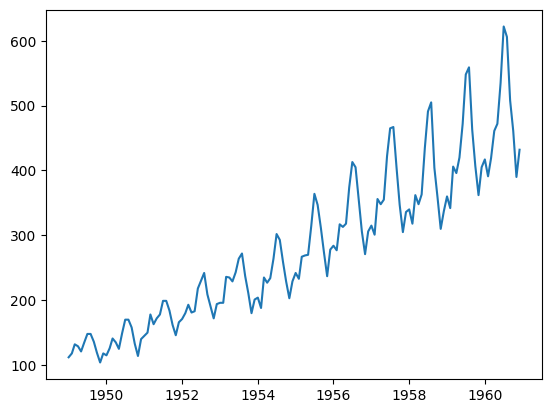

In [ ]:
plt.plot(time_series)

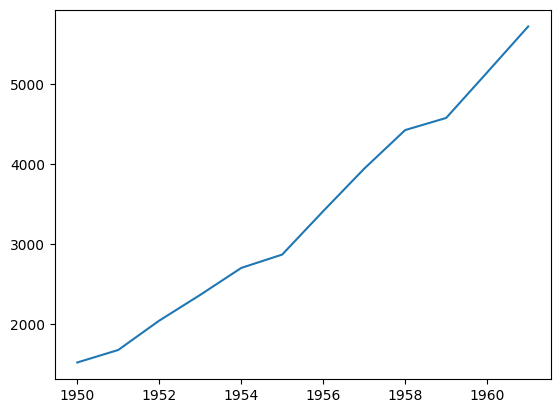

In [ ]:
time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano)

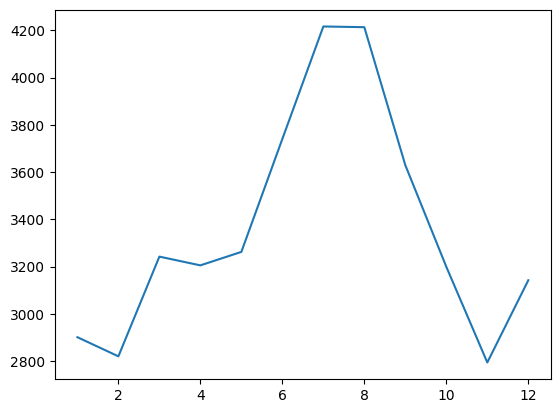

In [ ]:
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes)

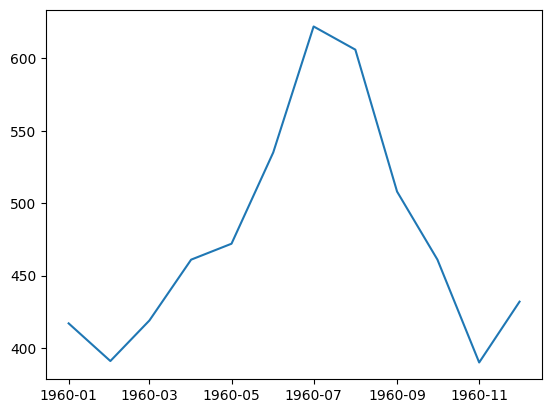

In [ ]:
time_series_datas = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_datas)

#Decomposição da série temporal

In [ ]:
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

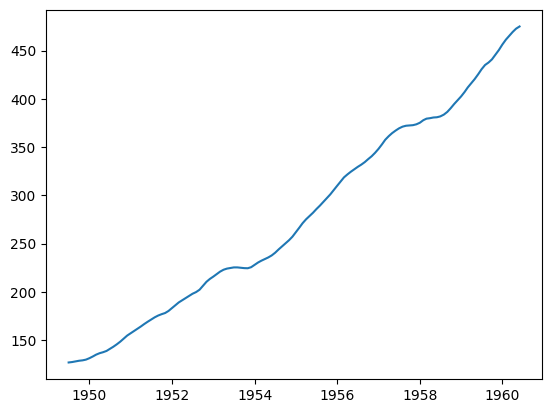

In [ ]:
plt.plot(tendencia)

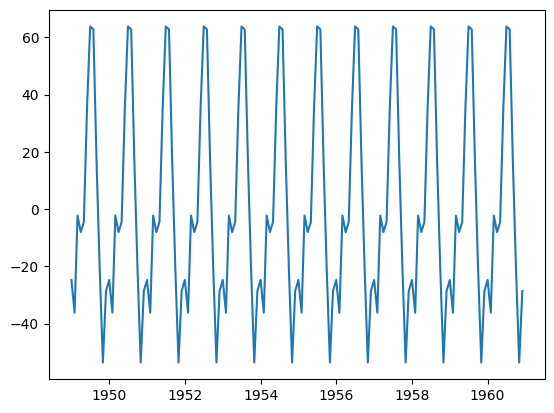

In [ ]:
plt.plot(sazonal)

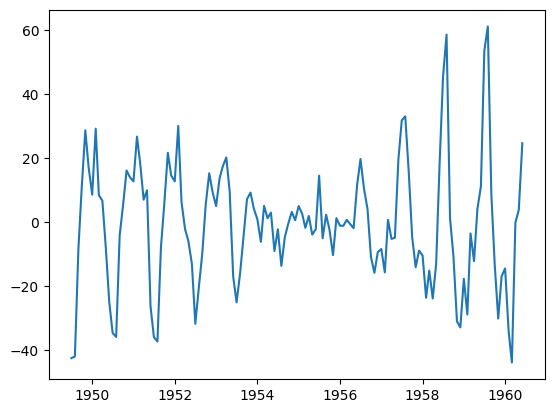

In [ ]:
plt.plot(aleatorio)

#Previsões com ARIMA

In [ ]:
#Parâmetros P,Q e D
model = auto_arima(time_series, order=(2,1,2))

In [ ]:
model.order

(4, 1, 3)

In [ ]:
predictions = model.predict(n_periods=12)

In [ ]:
predictions

1961-01-01    467.573736
1961-02-01    490.494460
1961-03-01    509.136849
1961-04-01    492.554702
1961-05-01    495.305965
1961-06-01    475.947817
1961-07-01    476.339865
1961-08-01    475.552147
1961-09-01    472.353805
1961-10-01    483.889647
1961-11-01    475.570149
1961-12-01    485.921508
Freq: MS, dtype: float64

#Gráfico das previsões

In [ ]:
len(time_series)

144

In [ ]:
train = time_series[:130]
train.shape

(130,)

In [ ]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [ ]:
test = time_series[130:]
test.shape

(14,)

In [ ]:
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [ ]:
model2 = auto_arima(train, supress_warning=True)

In [ ]:
test.index

DatetimeIndex(['1959-11-01', '1959-12-01', '1960-01-01', '1960-02-01',
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [ ]:
prediction = pd.DataFrame(model2.predict(n_periods=14),index=test.index)
prediction.columns = ['passengers_predictions']
prediction

,passengers_predictions
Month,
1959-11-01,357.690511
1959-12-01,334.857449
1960-01-01,342.488592
1960-02-01,375.944534
1960-03-01,424.126300
1960-04-01,473.151468
1960-05-01,510.388415
1960-06-01,527.724284
1960-07-01,523.268370


In [ ]:
test

Month
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

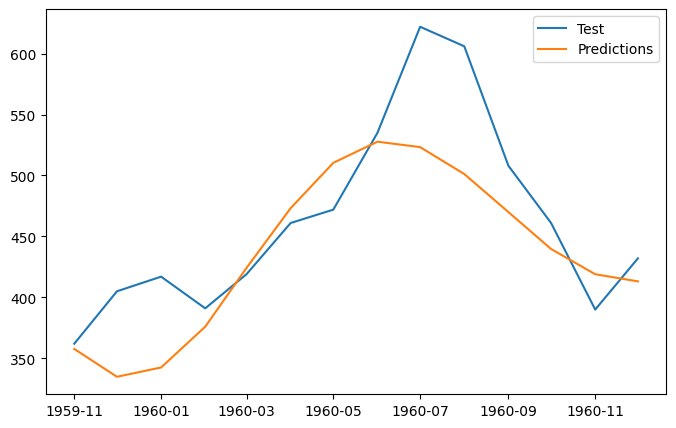

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train_labe = 'Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predictions')
plt.legend();

#Série temporal com Facebook Prophet - previsão de visualizações diárias de páginas web

In [8]:
!pip install prophet

In [9]:
from prophet import Prophet

In [18]:
dataset= pd.read_csv('/content/page_wikipedia.csv')
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [12]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


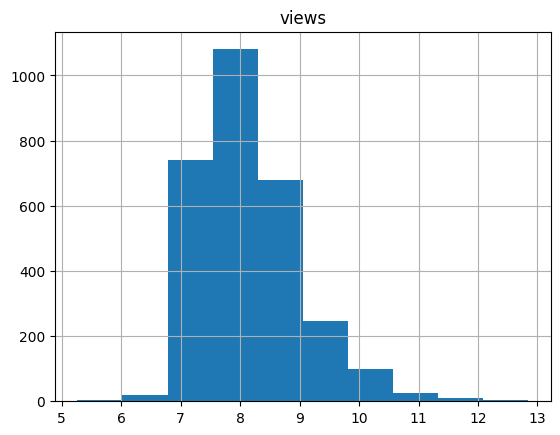

In [13]:
dataset.hist();

In [19]:
dataset = dataset[['date', 'views']].rename(columns = {'date': 'ds', 'views': 'y'})
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [20]:
dataset = dataset.sort_values(by='ds')
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


#Construção do modelo e previsões

In [21]:
model = Prophet()
model.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkfxrw6c4/sw4hrkag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkfxrw6c4/wbhufbhg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9451', 'data', 'file=/tmp/tmpkfxrw6c4/sw4hrkag.json', 'init=/tmp/tmpkfxrw6c4/wbhufbhg.json', 'output', 'file=/tmp/tmpkfxrw6c4/prophet_modelmmgep1lj/prophet_model-20240112112626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:26:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:26:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [23]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041704,8.172247,9.433951,8.041704,8.041704,0.802946,0.802946,0.802946,0.352288,0.352288,0.352288,0.450658,0.450658,0.450658,0.0,0.0,0.0,8.844650
1,2007-12-11,8.040157,7.967646,9.244179,8.040157,8.040157,0.553024,0.553024,0.553024,0.119636,0.119636,0.119636,0.433389,0.433389,0.433389,0.0,0.0,0.0,8.593182
2,2007-12-12,8.038611,7.772513,8.996042,8.038611,8.038611,0.350386,0.350386,0.350386,-0.066669,-0.066669,-0.066669,0.417055,0.417055,0.417055,0.0,0.0,0.0,8.388997
3,2007-12-13,8.037064,7.713602,8.982553,8.037064,8.037064,0.329846,0.329846,0.329846,-0.072254,-0.072254,-0.072254,0.402100,0.402100,0.402100,0.0,0.0,0.0,8.366910
4,2007-12-14,8.035517,7.707085,8.981219,8.035517,8.035517,0.319356,0.319356,0.319356,-0.069575,-0.069575,-0.069575,0.388931,0.388931,0.388931,0.0,0.0,0.0,8.354874


In [24]:
len(dataset), len(forecast)

(2905, 2995)

In [25]:
len(forecast) - len(dataset)

90

In [26]:
forecast.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.559905,7.928075,9.172160,7.559905,7.559905,0.999855,0.999855,0.999855,-0.072254,-0.072254,-0.072254,1.072109,1.072109,1.072109,0.0,0.0,0.0,8.559760
2906,2016-01-22,7.558883,7.978701,9.105960,7.558883,7.558883,1.016860,1.016860,1.016860,-0.069575,-0.069575,-0.069575,1.086435,1.086435,1.086435,0.0,0.0,0.0,8.575743
2907,2016-01-23,7.557862,7.744090,8.959974,7.557862,7.557862,0.786590,0.786590,0.786590,-0.311713,-0.311713,-0.311713,1.098303,1.098303,1.098303,0.0,0.0,0.0,8.344452
2908,2016-01-24,7.556840,8.111129,9.286082,7.556840,7.556840,1.155604,1.155604,1.155604,0.048287,0.048287,0.048287,1.107318,1.107318,1.107318,0.0,0.0,0.0,8.712445
2909,2016-01-25,7.555819,8.411419,9.603618,7.555819,7.555819,1.465356,1.465356,1.465356,0.352288,0.352288,0.352288,1.113068,1.113068,1.113068,0.0,0.0,0.0,9.021175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.473079,6.323189,7.543457,7.450407,7.496016,-0.560878,-0.560878,-0.560878,-0.069575,-0.069575,-0.069575,-0.491303,-0.491303,-0.491303,0.0,0.0,0.0,6.912201
2991,2016-04-16,7.472058,6.071948,7.298482,7.448900,7.495447,-0.772927,-0.772927,-0.772927,-0.311713,-0.311713,-0.311713,-0.461214,-0.461214,-0.461214,0.0,0.0,0.0,6.699131
2992,2016-04-17,7.471036,6.459379,7.662919,7.447492,7.494867,-0.383237,-0.383237,-0.383237,0.048287,0.048287,0.048287,-0.431524,-0.431524,-0.431524,0.0,0.0,0.0,7.087799
2993,2016-04-18,7.470015,6.789640,8.017343,7.445562,7.494287,-0.050685,-0.050685,-0.050685,0.352288,0.352288,0.352288,-0.402973,-0.402973,-0.402973,0.0,0.0,0.0,7.419330


#Gráfico das previsões




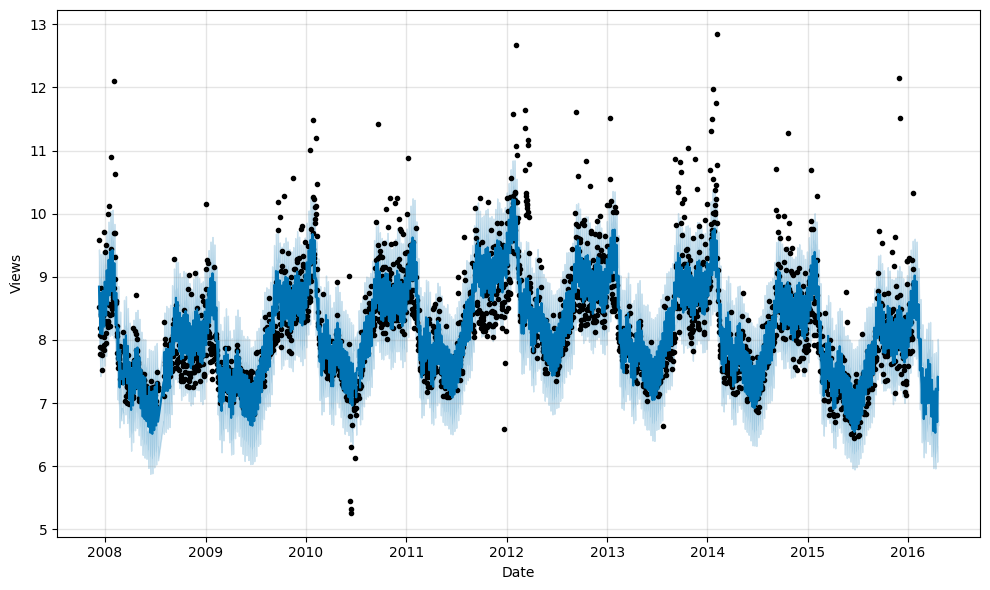

In [27]:
model.plot(forecast,xlabel ='Date',ylabel='Views');

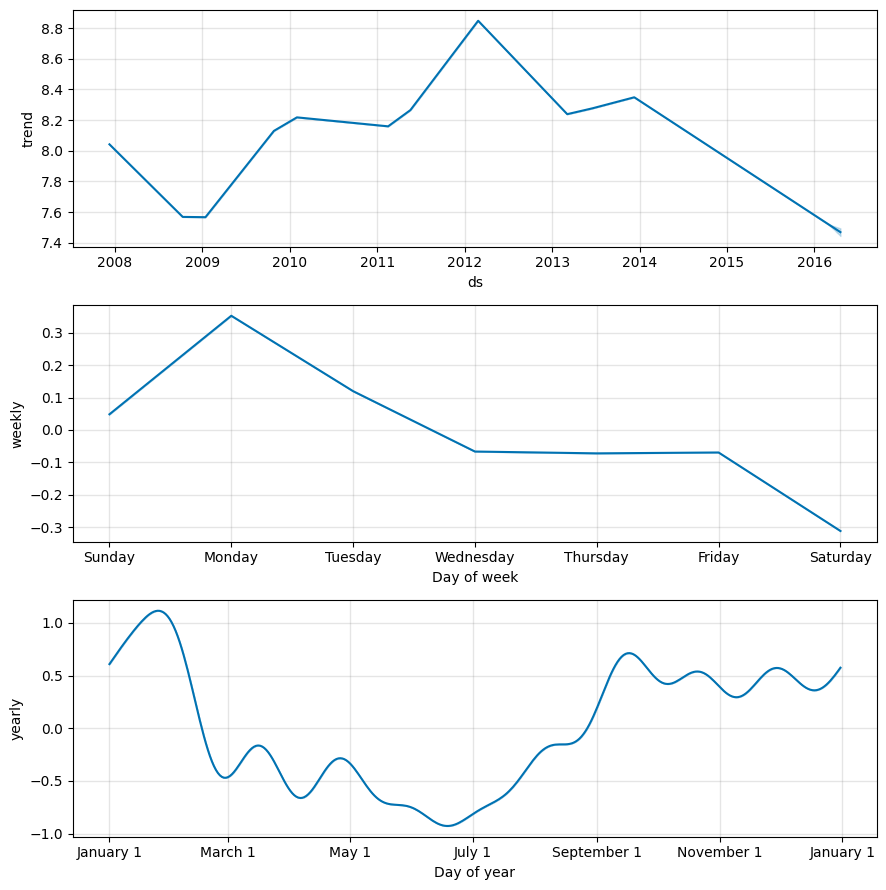

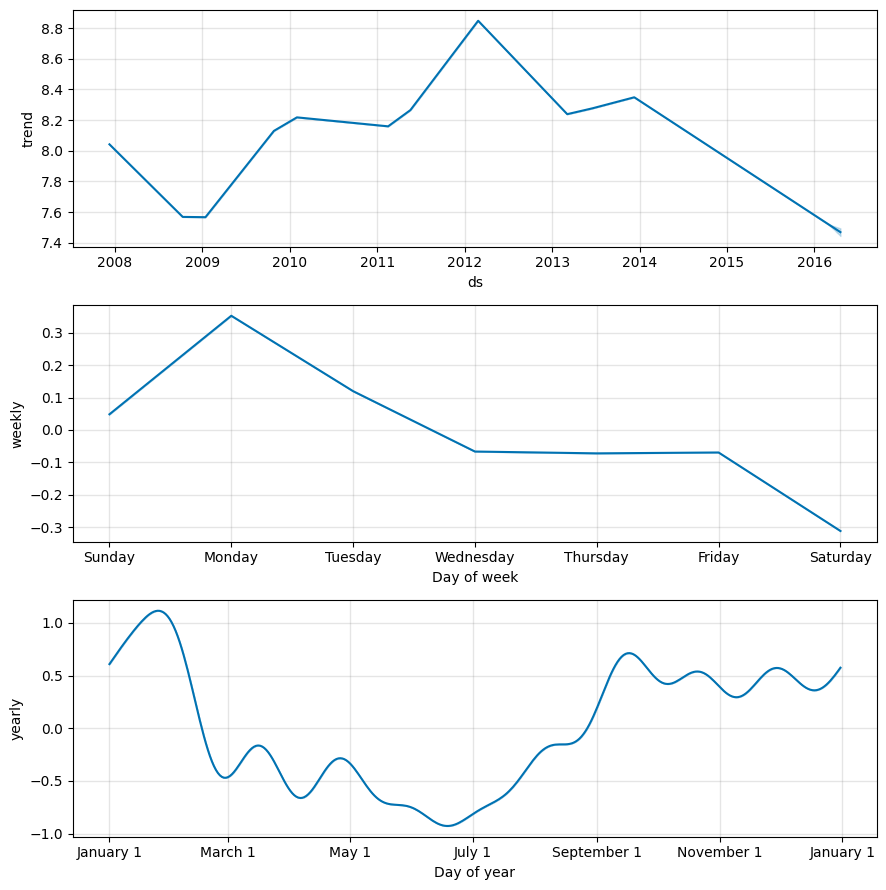

In [28]:
model.plot_components(forecast)

In [29]:
from prophet.plot import plot_plotly, plot_components_plotly

In [30]:
plot_plotly(model, forecast)

In [31]:
plot_components_plotly(model, forecast)